<a href="https://colab.research.google.com/github/RaedAbdelkefi/Facial-Expression-Recognition/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import SeparableConv2D
from keras import layers
from keras.preprocessing.image import ImageDataGenerator


#Loading the Models

In [ ]:
from keras.models import load_model
model1 = load_model('model.h5')
model2= load_model('model2.h5')
from google.colab.patches import cv2_imshow
import cv2


OSError: ignored

#Training the Models

In [ ]:
def expression(path,model):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  imagePath = path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  emotions=[]
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = cv2.resize(roi_gray, (48, 48))
    cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    emotions.append(emotion_num_map[maxindex])
  return emotions


In [ ]:
def recog(img,model):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img=cv2.imread(img)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image=img
  faces = facecasc.detectMultiScale(img,scaleFactor=1.3, minNeighbors=10)
  if len(faces)==0:
    return None
  i=1
  persons=[]
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    baba = img[y:y + h, x:x + w]
    baba = cv2.resize(baba, (256, 256))
    baba=baba/255
    baba = np.expand_dims(baba, axis=0)

    prediction = model.predict(baba)

    maxindex = int(np.argmax(prediction))
    person=Avengers[maxindex]
    pred=prediction[0][maxindex]
    if pred < 0.4:
      person="unknown"

    persons.append(person)

    i+=1
  return persons


In [ ]:
def recog_expression(img,emotions,person):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img=cv2.imread(img)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image=img
  faces = facecasc.detectMultiScale(img,scaleFactor=1.3, minNeighbors=10)
  if len(faces)==0:
    return None
  i=0
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    personage=person[i]+" is "+emotions[i]
    print(personage)
    cv2.putText(image, personage, (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)

    i+=1
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2_imshow(image)
    # img = np.expand_dims(img, axis=-1)
    # img = np.repeat(img, 3, axis=-1)                     #croping



No of faces :  1
1/1 [==============================] - 0s 89ms/step
Iron Man is angry


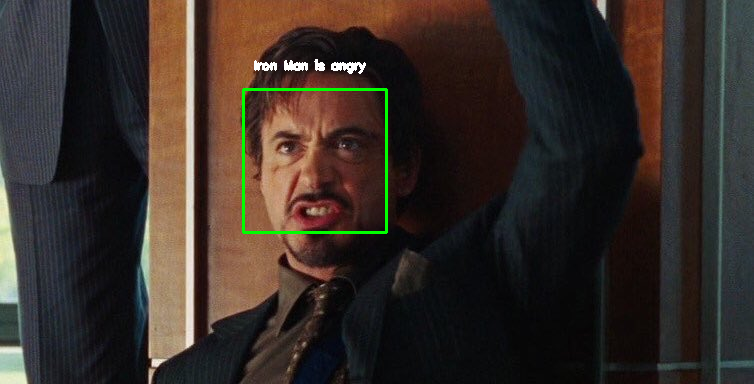

In [ ]:
emotion_num_map={0:'angry', 1:'disgusted', 2:'affraid', 3:'happy', 4: 'sad', 5: 'surprised', 6: 'neutral'}
Avengers={0:'Captain America',1:'Thor',2:'Hulk',3:'Iron Man',4:'Black Widow'}
path="/content/EFljzbOXkAEjIqv.jpg"
emotion=expression(path,model1)
person=recog(path,model2)
recog_expression(path,emotion,person)

No of faces :  1
1/1 [==============================] - 0s 42ms/step
Black Widow is neutral


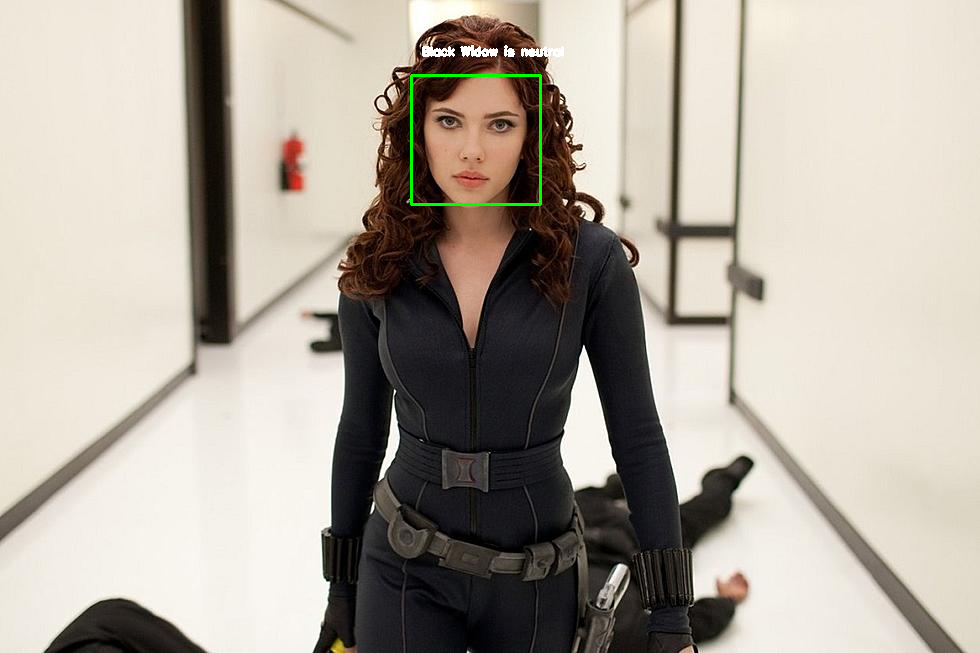

In [ ]:
emotion_num_map={0:'angry', 1:'disgusted', 2:'affraid', 3:'happy', 4: 'sad', 5: 'surprised', 6: 'neutral'}
Avengers={0:'Captain America',1:'Thor',2:'Hulk',3:'Iron Man',4:'Black Widow'}
path="/content/avengers-then-now.jpg"
emotion=expression(path,model1)
person=recog(path,model2)
recog_expression(path,emotion,person)

No of faces :  1
1/1 [==============================] - 0s 34ms/step
Thor is happy


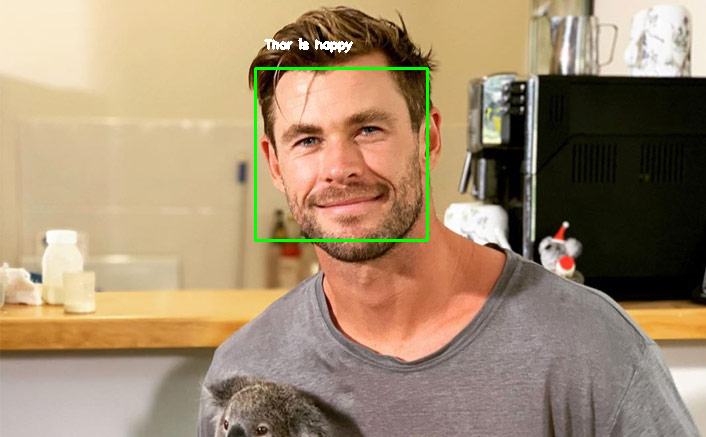

In [ ]:
emotion_num_map={0:'angry', 1:'disgusted', 2:'affraid', 3:'happy', 4: 'sad', 5: 'surprised', 6: 'neutral'}
Avengers={0:'Captain America',1:'Thor',2:'Hulk',3:'Iron Man',4:'Black Widow'}
path="/content/chris-hemsworth-aka-thor-fulfils-this-special-birthday-wish-but-his-kids-are-not-happy-001.jpg"
emotion=expression(path,model1)
person=recog(path,model2)
recog_expression(path,emotion,person)

In [ ]:
!jupyter nbconvert --to html main.ipynb


[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] Writing 2040648 bytes to main.html
